## Netflix Analysis

In [11]:
import pandas as pd

data = pd.read_csv('Netflix Userbase.csv')
data.head()

User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month

In [12]:
data.describe()

User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000

### 차트그리기

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Bar Plot - Gender distribution

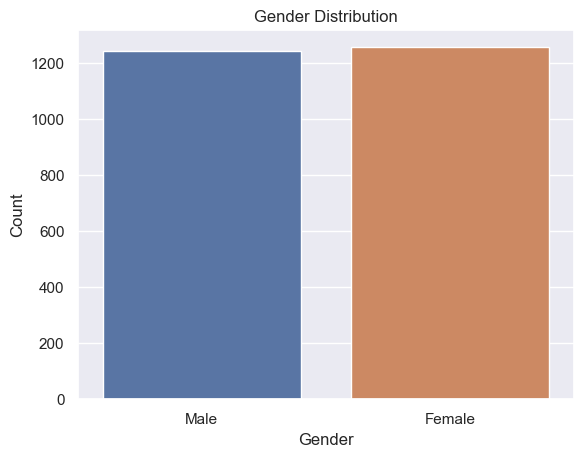

In [13]:
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Bar plot - Age group distribution

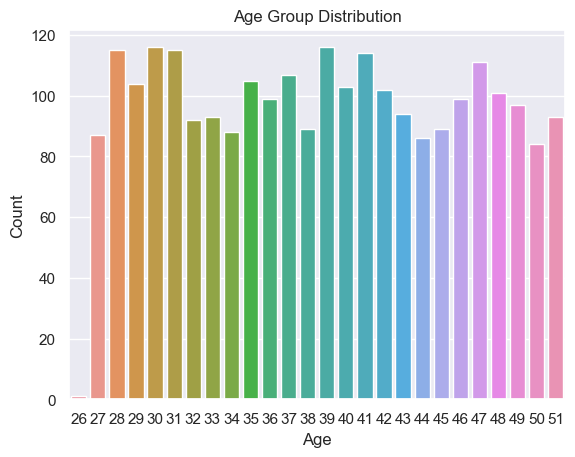

In [14]:
sns.countplot(x='Age', data=data)
plt.title('Age Group Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Pie chart - Subscription types

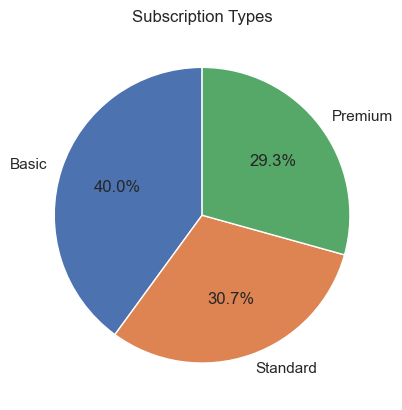

In [15]:
subscription_counts = data['Subscription Type'].value_counts()
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Subscription Types')
plt.show()

#### Box plot - Monthly revenue by subscription type

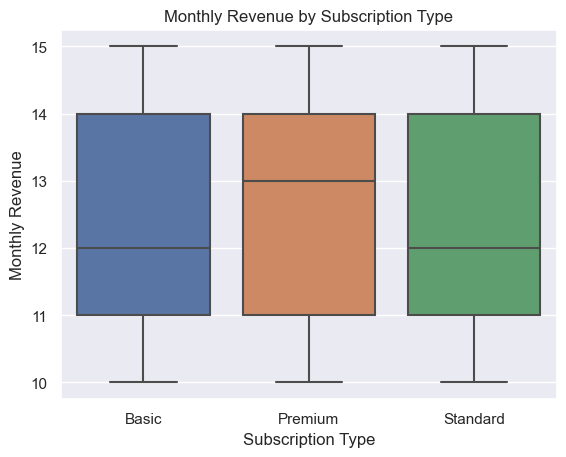

In [16]:
sns.boxplot(x='Subscription Type', y='Monthly Revenue', data=data)
plt.title('Monthly Revenue by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Monthly Revenue')
plt.show()

#### Heatmap (correlation matrix)

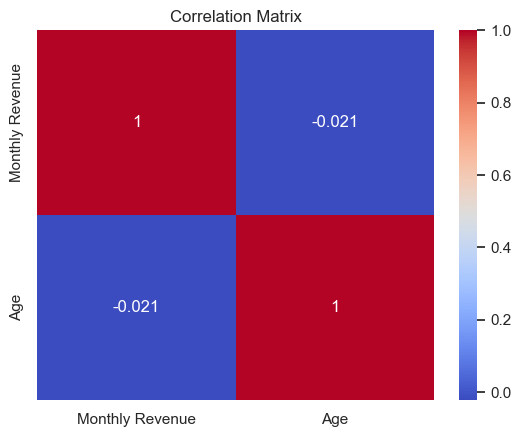

In [17]:
corr_matrix = data[['Monthly Revenue', 'Age']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Bar plot - Country distribution

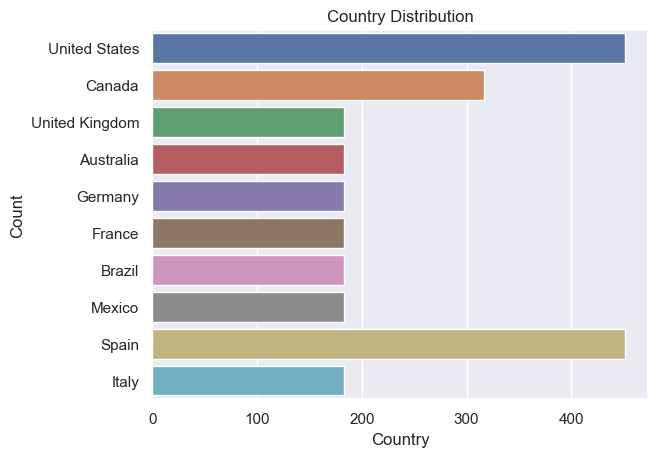

In [18]:
sns.countplot(y='Country', data=data)
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

#### Box plot - Monthly revenue by gender

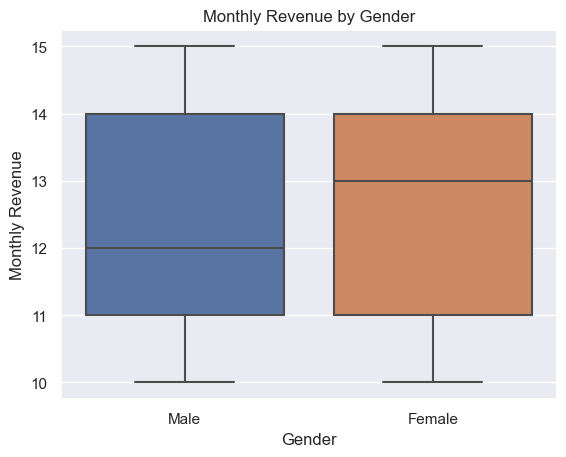

In [19]:
sns.boxplot(x='Gender', y='Monthly Revenue', data=data)
plt.title('Monthly Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly Revenue')
plt.show()

#### Violin plot - Age distribution by subscription type

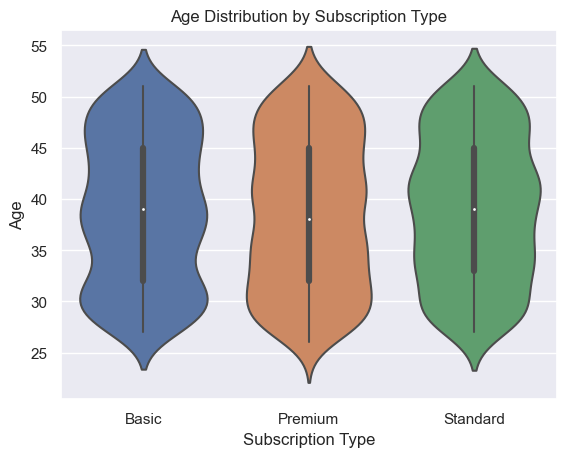

In [20]:
sns.violinplot(x='Subscription Type', y='Age', data=data)
plt.title('Age Distribution by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Age')
plt.show()

#### Count plot - Device usage

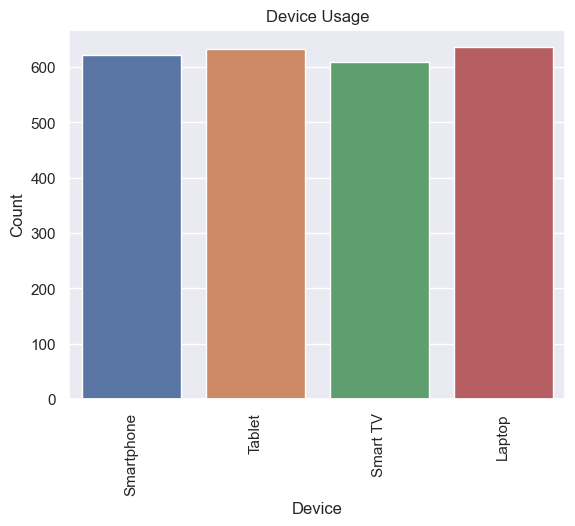

In [21]:
sns.countplot(x='Device', data=data)
plt.title('Device Usage')
plt.xlabel('Device')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

#### Scatter plot - Monthly revenue vs. Plan Duration

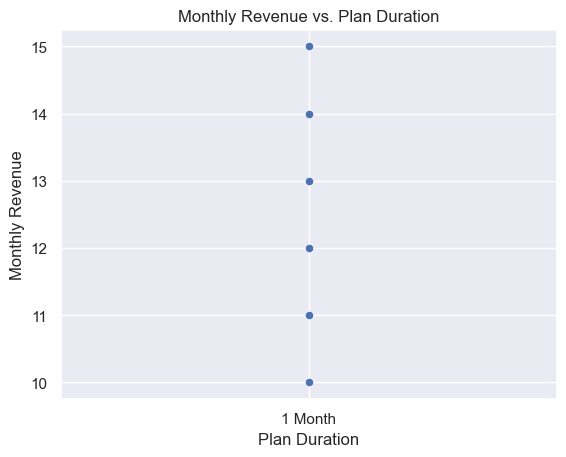

In [22]:
sns.scatterplot(x='Plan Duration', y='Monthly Revenue', data=data)
plt.title('Monthly Revenue vs. Plan Duration')
plt.xlabel('Plan Duration')
plt.ylabel('Monthly Revenue')
plt.show()

#### 결론

넷플릭스 사용자 데이터셋 분석을 통해 성별 분포, 연령 demographics, 그리고 구독 유형에서 중요한 차이점을 발견했습니다. 이는 경쟁이 치열한 스트리밍 산업에서 타겟 마케팅 캠페인과 맞춤형 콘텐츠 제공에 대한 실행 가능한 통찰을 제공합니다.

데이터는 남성과 여성 사용자 사이의 거의 균등한 분포를 보여주며, 30-40세 연령대에 약간의 집중이 있다는 점을 강조합니다. 이 연령대 프로파일은 해당 연령층과 잘 맞는 콘텐츠를 개발하여 참여율과 유지율을 향상시킬 수 있는 기회를 시사합니다.

또한, 표준 구독 선호도는 사용자들 사이에서 비용과 기능 사이의 균형을 찾고 있다는 점을 나타냅니다. 이는 가격 전략과 구독 계획 개발에 대한 안내를 제공하여 사용자 기대와 선호를 더 잘 충족시킬 수 있습니다.

결론적으로, 이러한 통찰을 활용하여 넷플릭스 플랫폼에서 사용자 유치, 유지 및 만족도를 강화하기 위한 전략적 결정을 할 수 있습니다. 식별된 사용자 선호를 반영한 마케팅 노력과 콘텐츠 전략을 조율함으로써 넷플릭스는 경쟁이 치열한 스트리밍 시장에서의 입지를 강화할 수 있습니다.

### Geo Analysis

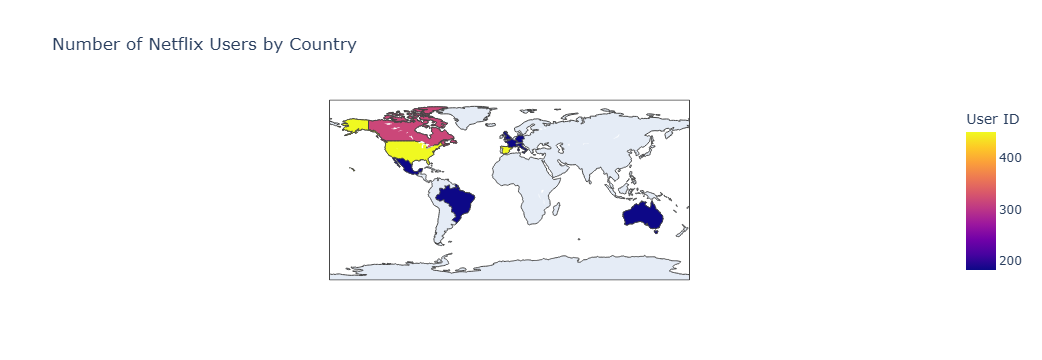

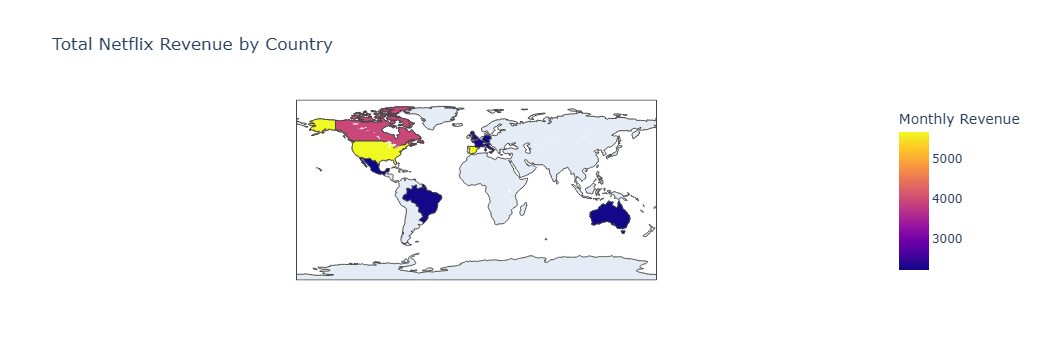

In [2]:
import plotly.express as px

# Group the data by country and calculate the total number of users and total revenue from each country
country_data = data.groupby('Country').agg({'User ID': 'count', 'Monthly Revenue': 'sum'}).reset_index()

# Create a choropleth map showing the number of Netflix users in each country
fig1 = px.choropleth(country_data, locations='Country', locationmode='country names',
                     color='User ID', title='Number of Netflix Users by Country',
                     hover_name='Country', color_continuous_scale='Plasma')
fig1.show()

# Create a choropleth map showing the total revenue from each country
fig2 = px.choropleth(country_data, locations='Country', locationmode='country names',
                     color='Monthly Revenue', title='Total Netflix Revenue by Country',
                     hover_name='Country', color_continuous_scale='Plasma')
fig2.show()

### Data Analysis

#### Who are Netflix's users?

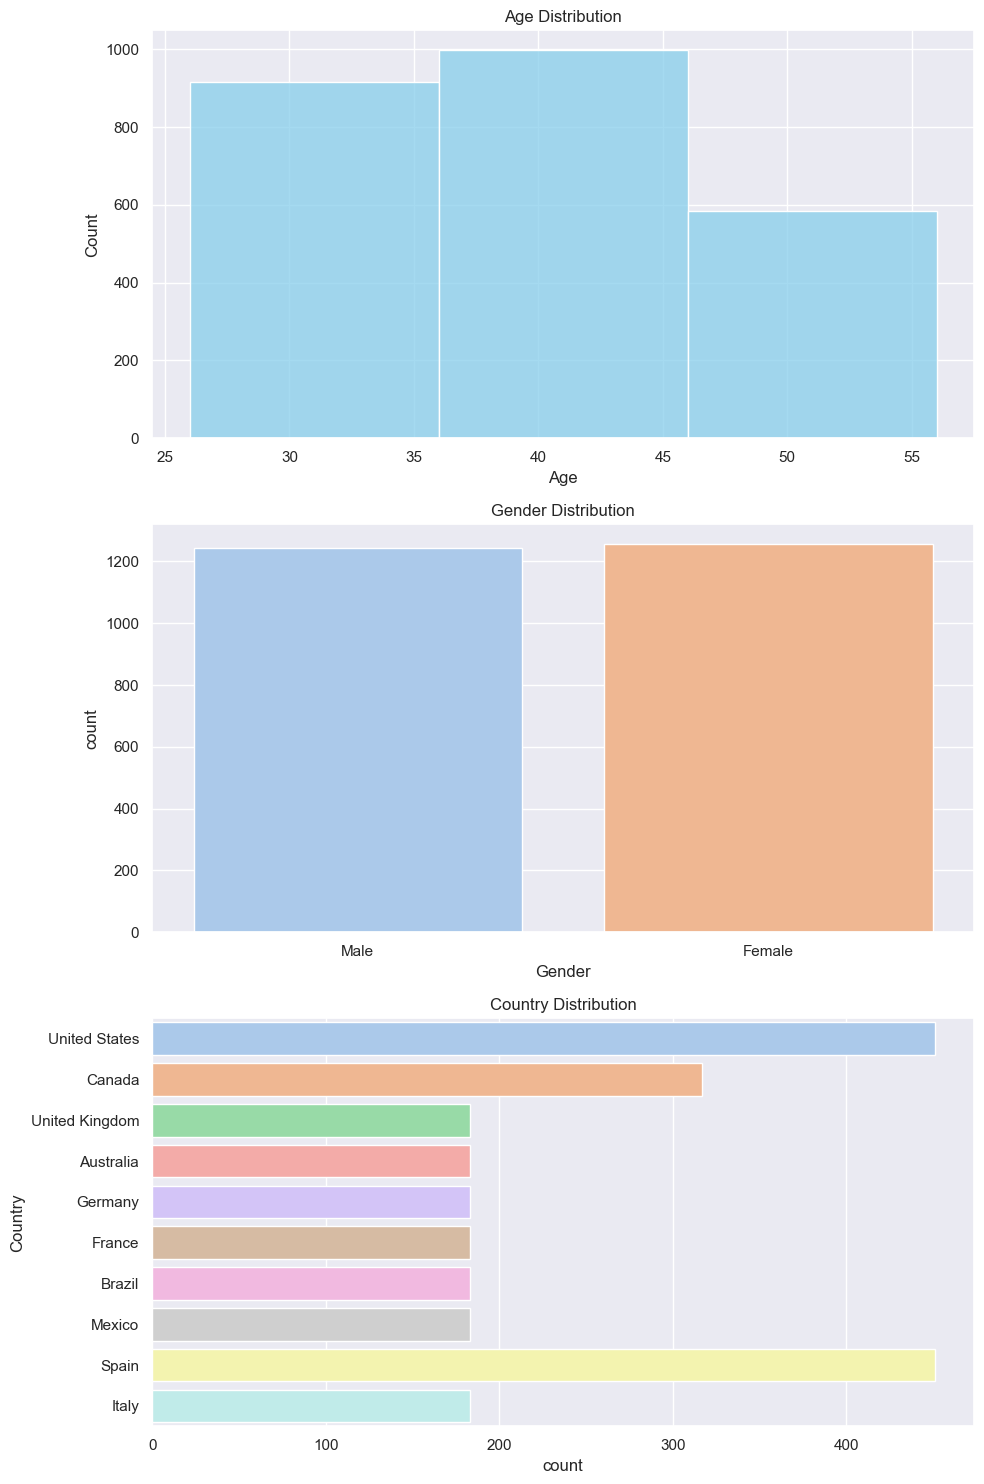

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for the plots
sns.set_theme()

# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot the age distribution
sns.histplot(data=data, x="Age", binwidth=10, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution')

# Plot the gender distribution
sns.countplot(data=data, x="Gender", palette='pastel', ax=axes[1])
axes[1].set_title('Gender Distribution')

# Plot the country distribution
sns.countplot(y="Country", data=data, palette='pastel', ax=axes[2])
axes[2].set_title('Country Distribution')

# Adjust the layout
plt.tight_layout()
plt.show()

##### 넷플릭스 사용자 이해하기

* 나이 분포: 
넷플릭스 사용자의 나이 분포는 다양하며, 가장 흔한 연령대는 30-40세입니다. 20-30세와 40-50세 사용자도 상당수 있습니다. 이는 넷플릭스의 콘텐츠가 다양한 연령대에 매력적이라는 긍정적인 신호입니다.

* 성별 분포: 
넷플릭스 사용자의 성별 분포는 남성과 여성 사이에 거의 균형을 이루고 있습니다. 이는 플랫폼의 콘텐츠가 양성에게 고르게 매력적임을 나타냅니다.

* 지리적 분포: 
넷플릭스 사용자는 여러 국가에 걸쳐 있으며, 가장 많은 사용자를 보유한 국가는 미국, 영국, 캐나다, 호주 등입니다. 넷플릭스의 넓은 지리적 도달 범위는 그 글로벌 매력을 증명합니다.

#### How are Netflix's users consuming content?

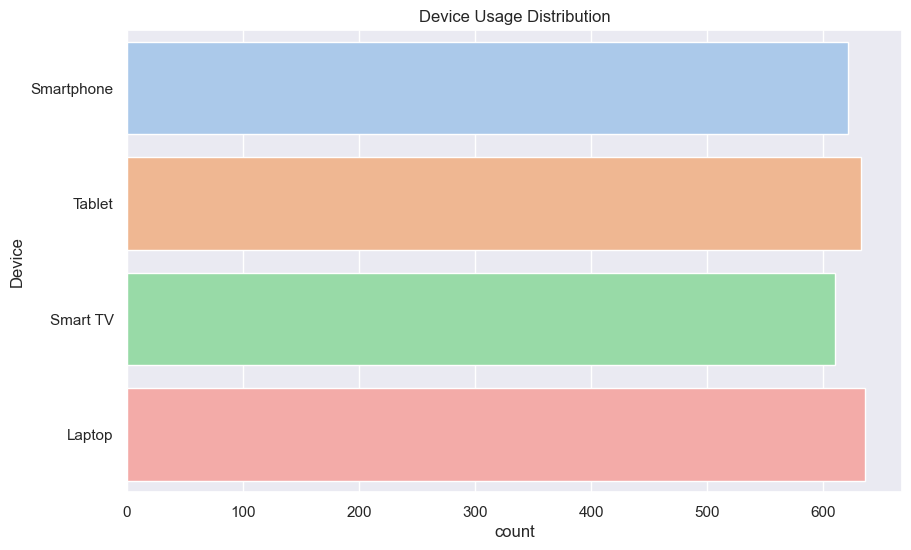

In [5]:
# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Plot the device usage distribution
sns.countplot(y="Device", data=data, palette='pastel')
plt.title('Device Usage Distribution')

# Show the plot
plt.show()


##### 넷플릭스 콘텐츠 소비 이해하기

* 장치 사용 분포: 
가장 인기 있는 넷플릭스 콘텐츠 소비 장치는 스마트폰이며, 그 다음으로 노트북, 스마트 TV, 태블릿이 있습니다. 많은 넷플릭스 사용자가 모바일 장치에서 콘텐츠를 소비하는 것을 선호합니다. 이는 이러한 장치가 제공하는 유연성과 편리성, 즉 사용자들이 이동 중에도 콘텐츠를 시청할 수 있기 때문일 수 있습니다.

#### What are the subscription habits of our users?

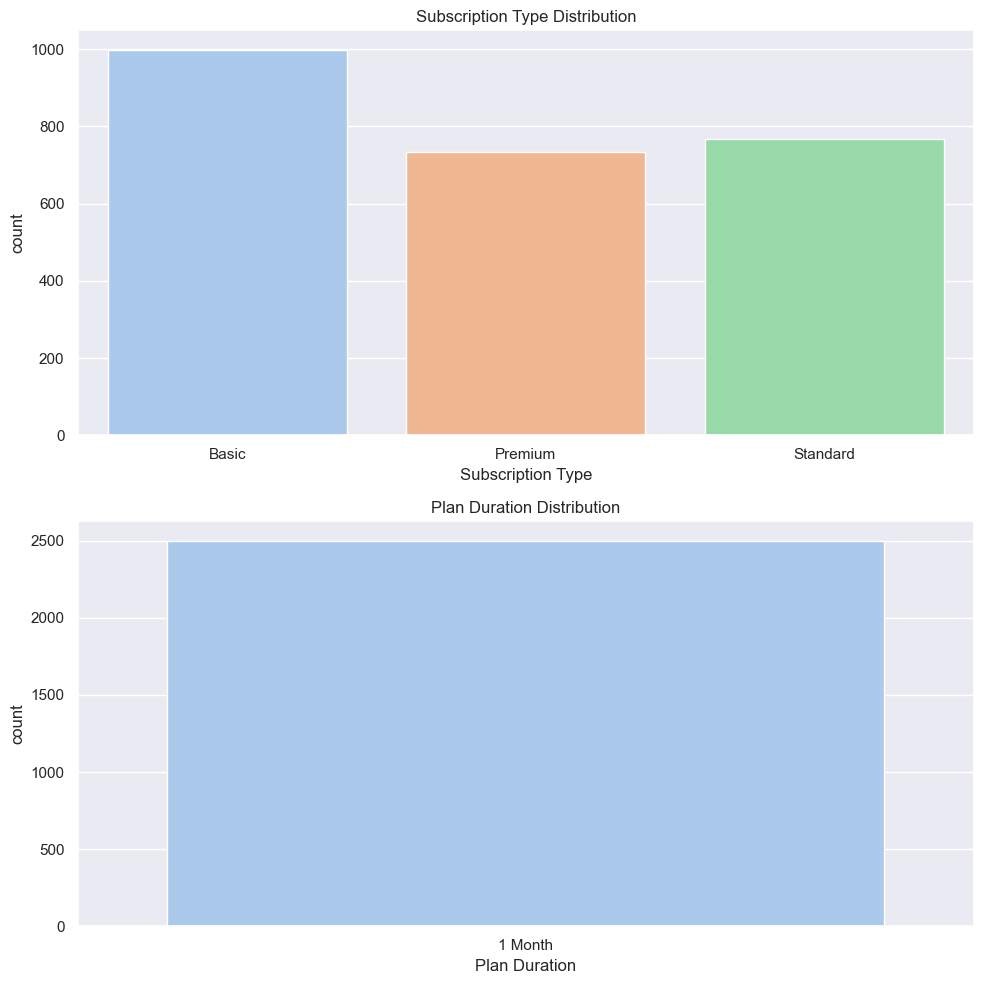

In [6]:
# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot the subscription type distribution
sns.countplot(data=data, x="Subscription Type", palette='pastel', ax=axes[0])
axes[0].set_title('Subscription Type Distribution')

# Plot the plan duration distribution
sns.countplot(data=data, x="Plan Duration", palette='pastel', ax=axes[1])
axes[1].set_title('Plan Duration Distribution')

# Adjust the layout
plt.tight_layout()
plt.show()

##### 넷플릭스 구독 습관 이해하기

* 구독 유형 분포: 
넷플릭스 사용자들 사이에서 가장 선호되는 구독 유형은 스탠다드 구독이며, 그 다음으로 기본 및 프리미엄 구독이 있습니다. 이는 사용자들이 비용과 기능의 균형을 중요시하며, HD 스트리밍과 두 대의 기기에서 동시 스트리밍이 가능한 스탠다드 요금제를 선호함을 시사합니다.

* 요금제 기간 분포: 
대부분의 넷플릭스 사용자는 월간 구독 요금제를 이용하고 있습니다. 이는 넷플릭스의 "언제든지 취소 가능" 정책 덕분에 사용자들이 유연하게 서비스를 중단할 수 있기 때문입니다. 월간 요금제는 사용자들이 필요에 따라 요금제를 쉽게 변경할 수 있도록 해줍니다.








#### How much revenue is Netflix generating from its users?

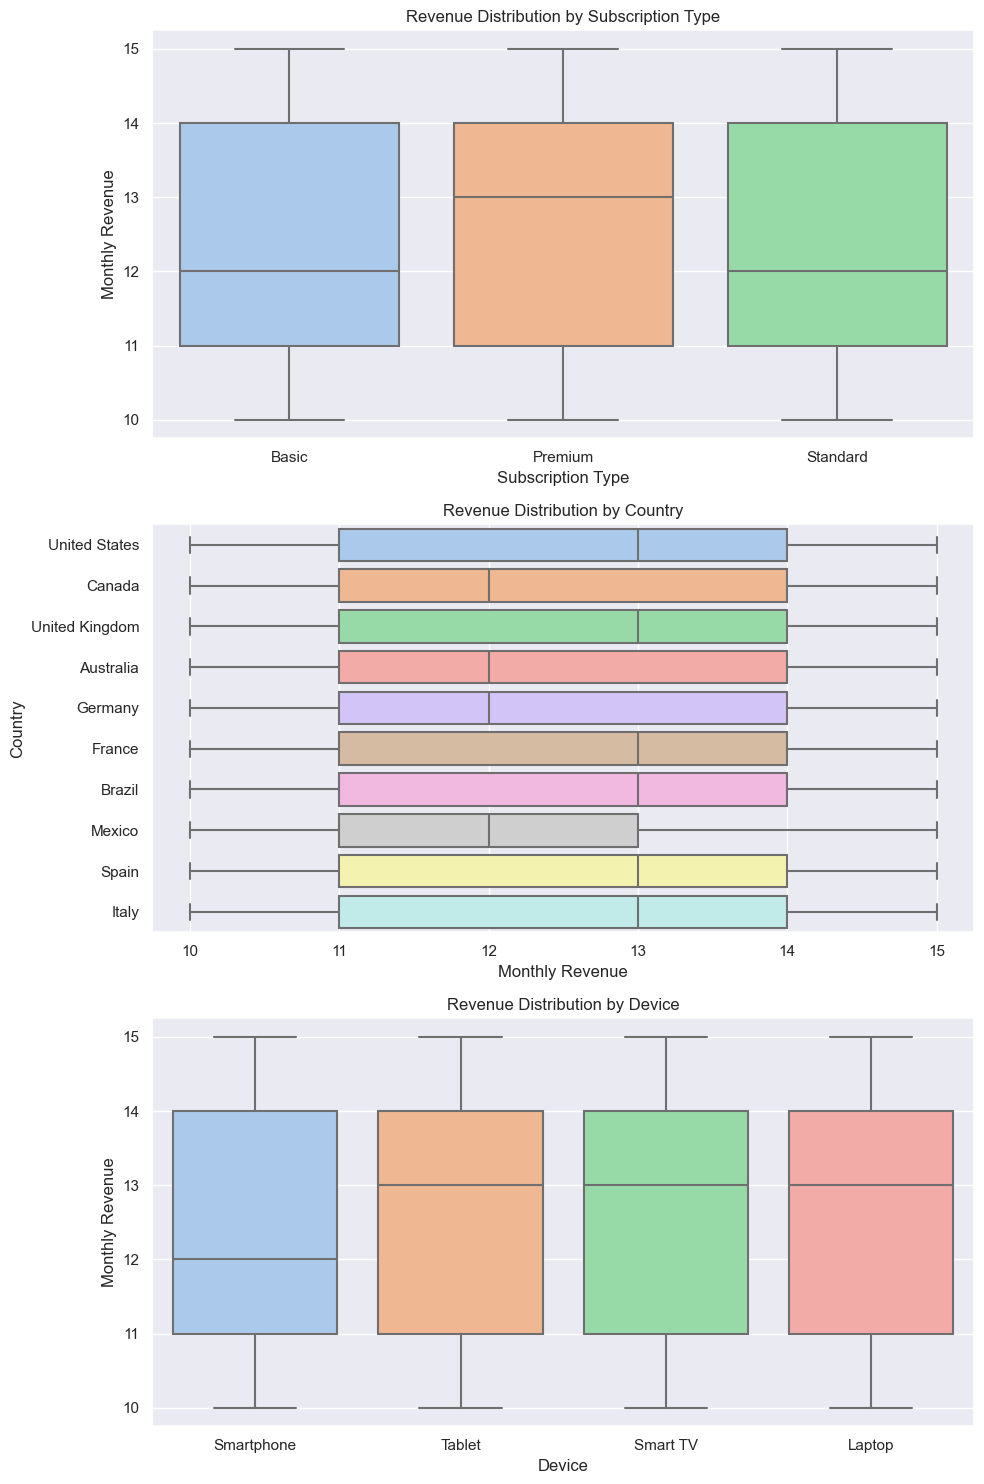

In [7]:
# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot the revenue distribution by subscription type
sns.boxplot(x="Subscription Type", y="Monthly Revenue", data=data, palette='pastel', ax=axes[0])
axes[0].set_title('Revenue Distribution by Subscription Type')

# Plot the revenue distribution by country
sns.boxplot(y="Country", x="Monthly Revenue", data=data, palette='pastel', ax=axes[1])
axes[1].set_title('Revenue Distribution by Country')

# Plot the revenue distribution by device
sns.boxplot(x="Device", y="Monthly Revenue", data=data, palette='pastel', ax=axes[2])
axes[2].set_title('Revenue Distribution by Device')

# Adjust the layout
plt.tight_layout()
plt.show()


##### 넷플릭스의 수익 창출 이해하기

* 구독 유형별 수익 분포: 
프리미엄 구독 유형이 사용자당 월간 가장 많은 수익을 창출하며, 그 다음으로 스탠다드와 기본 구독이 뒤따릅니다. 스탠다드 구독자가 가장 많지만, 프리미엄 구독의 높은 가격이 사용자당 수익을 더 높게 만듭니다.

* 국가별 수익 분포: 
국가별로 월간 사용자당 수익은 비슷한 수준을 보입니다. 이는 넷플릭스 구독 요금이 지역별로 유사하기 때문입니다.

* 장치별 수익 분포: 
사용 장치는 사용자당 월간 수익에 큰 영향을 미치지 않습니다. 이는 장치 선택이 구독 유형과 지출 금액과 무관함을 시사합니다.

#### What is our churn rate?

In [8]:
from datetime import datetime

# Convert the 'Join Date' and 'Last Payment Date' columns to datetime objects
data['Join Date'] = pd.to_datetime(data['Join Date'], format='%d-%m-%y')
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'], format='%d-%m-%y')

# Calculate the number of days between the join date and the last payment date
data['Days Active'] = (data['Last Payment Date'] - data['Join Date']).dt.days

# Calculate the churn rate
churn_rate = (data['Days Active'] < 30).mean()

churn_rate

0.0016

##### 넷플릭스 이탈률 이해하기

* 이탈률:
분석에서는 사용자가 30일 미만으로 활동한 경우 "이탈"로 간주합니다. 이 정의에 따르면 데이터셋의 이탈률은 약 0.16%입니다. 이 낮은 이탈률은 대부분의 사용자가 첫 달 이후에도 넷플릭스를 계속 사용하며, 서비스에 대한 높은 만족도를 나타냅니다.

* 고려 사항: 
실제 상황에서는 사용자의 활동 빈도와 최근 활동, 구독 기간 등을 고려하여 더 정교한 방법으로 이탈률을 계산하는 것이 바람직합니다.

### Summary

* 사용자 인구 특성: 넷플릭스의 사용자는 다양하게 분포되어 있으며, 30-40세 연령대가 약간 더 많습니다. 성별 분포는 남성과 여성이 거의 균등하게 분포하고 있습니다. 사용자들은 미국, 영국, 캐나다, 호주 등 다양한 국가에서 옵니다.

* 콘텐츠 소비: 대부분의 넷플릭스 사용자들이 모바일 장치를 통해 콘텐츠를 소비하며, 특히 스마트폰을 주로 사용합니다. 그 다음으로 노트북, 스마트 TV, 태블릿을 사용합니다.

* 구독 습관: 사용자들은 주로 표준 구독을 선택하며, 이는 비용과 제공되는 기능 사이의 균형을 선호한다는 것을 나타냅니다. 대부분의 사용자들이 월간 요금제를 구독하며, 이는 언제든지 해지할 수 있는 넷플릭스의 정책을 반영합니다.

* 수익 생성: 가장 많은 사용자를 가진 표준 구독이 있음에도 불구하고, 프리미엄 구독이 높은 가격대로 인해 개별 사용자 당 수익을 가장 많이 생성합니다. 콘텐츠 소비에 사용되는 장치는 개별 사용자 당 생성되는 수익에 큰 영향을 미치지 않습니다.

* 이탈률: 30일 미만으로 활동한 사용자 비율인 이탈률은 약 0.16%로 상대적으로 낮으며, 높은 사용자 유지율을 나타냅니다.